Исходные данные

* P=0,3
* D=0,3
* I=0,001
* скорость 12

Иногда проходит очень ровно, но иногда срывается. В журнале 7_breakdown_03_03_001_12.log срыв происходит на прямой линии

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from loader import load_data 

In [2]:
data = load_data('./data/7_breakdown_03_03_001_12.log')
sensor0=data['sensor0']
sensor1=data['sensor1']
sensor2=data['sensor2']
sensor3=data['sensor3']
sensor4=data['sensor4']
left_pid_out = data['left_pid_out']
right_pid_out = data['right_pid_out']
actual_right_pid_out = []

In [4]:
print (len(sensor0))

6100


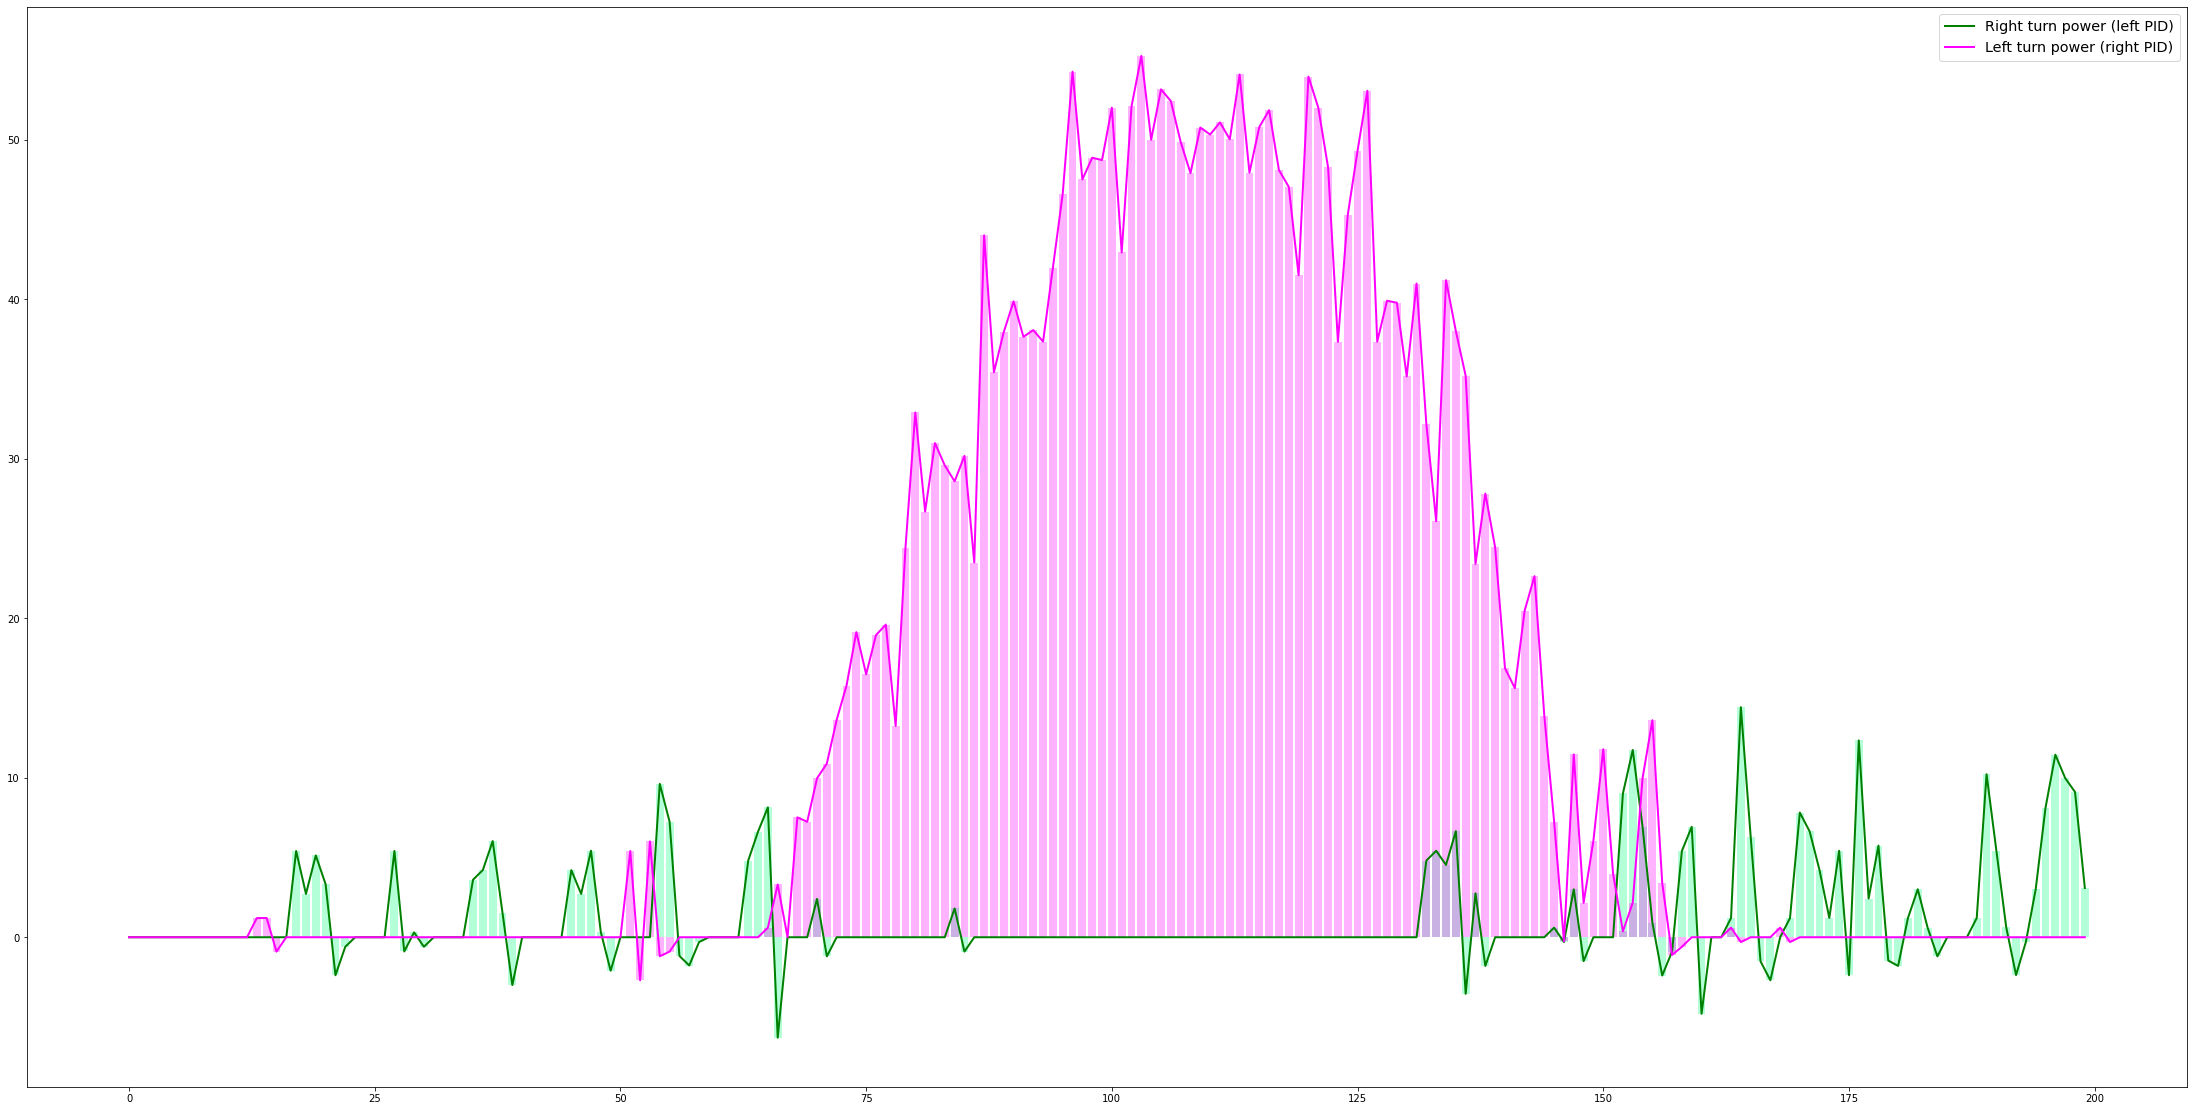

In [12]:
range = 200
start = 1500
end = start + range
fig = plt.figure(figsize=(30, 15))
ax = fig.add_axes([0,0,1,1])

#ax.plot(sensor1[start:end], linewidth=2.0, color = 'red', label='Left sensor')
#ax.bar(np.arange(0,range,1), sensor1[start:end], color = 'tomato', alpha = 0.3)
#ax.plot(sensor3[start:end], linewidth=2.0, color = 'blue', label = 'Right sensor')
#ax.bar(np.arange(0,range,1), sensor3[start:end], color = 'skyblue', alpha = 0.3)

ax.plot(left_pid_out[start:end], linewidth=2.0, color = 'green', label = 'Right turn power (left PID)')
ax.bar(np.arange(0,range,1), left_pid_out[start:end], alpha = 0.3, color = 'springgreen')
ax.plot(right_pid_out[start:end], linewidth=2.0, color = 'magenta', label = 'Left turn power (right PID)')
ax.bar(np.arange(0,range,1), right_pid_out[start:end], alpha = 0.3, color = 'magenta')
ax.legend(fontsize = 'x-large')


Что нужно делать:

* Попробовать уменьшить KP и KD
* Обрабатывать отрицательный PID при приближении к нулю
* Сделать более точную калибровку
* Выставить правильный период изменения сейчас dt всегда 1
* Не усиливать P значением D, а только гасить 
* Получать значение по среднему из трех измерений